In [340]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import codecs
import datetime
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression

In [478]:
#with open('March21.csv', 'r', encoding='mac_roman', newline='') as csvfile:
file = 'Bus2.xlsx'
df=pd.read_excel(file)

In [479]:
df.head()

,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,Monday,Wilson Stn,Mechanical,10.0,20.0,W/B,1291.0
1,Monday,Birchmount Garage,Utilized Off Route,1.0,1.0,S/B,8123.0
2,Monday,Davisville Station,Investigation,30.0,60.0,S/B,8306.0
3,Monday,Kennedy Station,Mechanical,22.0,44.0,S/B,7777.0
4,Monday,SWST,Mechanical,10.0,20.0,W/B,8453.0


In [480]:
df.isna().sum()

Day             0
Location       57
Incident        0
Min Delay      34
Min Gap        86
Direction       0
Vehicle      5996
dtype: int64

In [481]:
df['Min Delay']=df['Min Delay'].fillna(0)

In [482]:
df['Min Gap']=df['Min Gap'].fillna(0)

In [483]:
df['Vehicle']=df['Vehicle'].fillna(0)

In [484]:
#df['Direction']=df['Direction'].fillna('BW')

In [485]:
df['Day'] = df['Day'].map({'Monday': 1, 'Tuesday': 2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})

In [486]:
df['Incident'] = df['Incident'].map({'Mechanical': 1, 'Investigation': 2,'Utilized Off Route':3,'Late Leaving Garage':4,'Diversion':5,'Emergency Services':6,'General Delay':7})

In [487]:
df['Direction']=df['Direction'].map({'W/B':'WB','B/W':'BW','E/B':'EB','N/B':'NB','S/B':'SB'})

In [488]:
df['Direction']=df['Direction'].map({'WB':1,'EB':2,'SB':3,'NB':4,'BW':5})

In [489]:
df.tail()

,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
36435,6,Brimley and St Clair,5,22.0,44.0,2.0,8925.0
36436,6,Finch Station,1,30.0,60.0,2.0,8358.0
36437,6,Greenwin Village,3,10.0,20.0,3.0,8322.0
36438,6,Wilson Station,2,10.0,20.0,3.0,9040.0
36439,6,Queen,1,20.0,40.0,4.0,1269.0


In [490]:
df.isna().sum()

Day             0
Location       57
Incident        0
Min Delay       0
Min Gap         0
Direction    1825
Vehicle         0
dtype: int64

In [491]:
df = df.dropna()

In [492]:
df.isna().sum()

Day          0
Location     0
Incident     0
Min Delay    0
Min Gap      0
Direction    0
Vehicle      0
dtype: int64

In [501]:
X = np.array(df[['Min Gap','Incident','Day','Direction']])#prepare the independent variables for knn
y=np.array(df['Min Delay'])#prepare the dependent variables for knn
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)#train/test split of the dataset
knn = KNeighborsClassifier(n_neighbors=20)#instatiate the model

In [502]:
knn.fit(X_train,y_train) #fit the model using the train data
y_pred=knn.predict(X_test) #run predictions of the classification based on test data and assign y_pred

In [503]:
k = range(1,40,2)
avg_nz=[] #average non zero predictions
avg_z=[] #average false predictions
avg_score= [] #average accuracy score
#2 loops to iterate through each random train/test split and each neareat neighbour value
for i in k:
    split=np.random.uniform(low=0.1, high=0.3, size=(6))#train/test splits criteria
    score=[] 
    nz=[] 
    z=[]
    print('k =',i)
    for j in split:
        knn1 = KNeighborsClassifier(n_neighbors=i) 
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=j) 
        knn1.fit(X_train,y_train)
        y_pred=knn1.predict(X_test) 
        nz.append(np.count_nonzero(y_test==y_pred)) 
        z.append(np.count_nonzero(y_test!=y_pred))
        score.append(accuracy_score(y_test,y_pred)) 
    avg_score.append(np.mean(score))
    avg_z.append(np.mean(z))
    avg_nz.append(np.mean(nz)) 
    print("Average correct predictions: ", np.mean(nz))
    print('Average false predictions:',np.mean(z))
    print("Average accuracy score:", round(np.mean(score),4))
    print("")

k = 1
Average correct predictions:  4345.0
Average false predictions: 2540.1666666666665
Average accuracy score: 0.631

k = 3
Average correct predictions:  5736.5
Average false predictions: 2719.5
Average accuracy score: 0.6784

k = 5
Average correct predictions:  3927.1666666666665
Average false predictions: 1716.0
Average accuracy score: 0.6963

k = 7
Average correct predictions:  4726.666666666667
Average false predictions: 2033.1666666666667
Average accuracy score: 0.7

k = 9
Average correct predictions:  4919.333333333333
Average false predictions: 2103.0
Average accuracy score: 0.7005

k = 11
Average correct predictions:  4667.166666666667
Average false predictions: 1964.5
Average accuracy score: 0.7038

k = 13
Average correct predictions:  4164.0
Average false predictions: 1774.6666666666667
Average accuracy score: 0.7018

k = 15
Average correct predictions:  5458.166666666667
Average false predictions: 2290.3333333333335
Average accuracy score: 0.7043

k = 17
Average correct pr

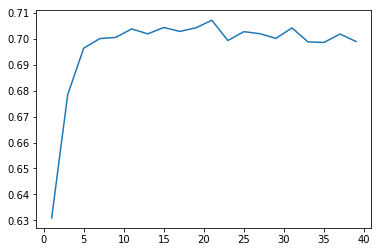

In [504]:
plt.plot(k,avg_score)